Provide a general overview of the training data.
The analysis concentrates on:
- frequences of classes;
- average span length of classes;
- a more detailed analysis of the instances of the "Repetition" class.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#### 1. Reading data from the file

In [29]:
TC_LABELS_FILE = "../data/train-task2-TC-with-spans.txt"

In [30]:
TRAIN_DATA_FOLDER = "../datasets/train-articles/"

In [31]:
column_names = {"document_id": np.int32, 
                "label": np.str, 
                "idx_from": np.int32, 
                "idx_to": np.int32,
                "span":np.str}

In [32]:
df = pd.read_csv(TC_LABELS_FILE, sep="\t", names=column_names.keys())

#### 2. Adding a new feature to the original table

In [33]:
df['span_length'] = df["span"].apply(lambda x : len(str(x).split()))

#### 3. Grouping instances by labels.

In [34]:
df_stat = df.groupby(['label']).span_length.describe().sort_values("count", ascending=False)

Adding a new feature.

In [35]:
df_stat["count_normalized"] = df_stat["count"]/df_stat["count"].sum()

In [36]:
df_stat

,count,mean,std,min,25%,50%,75%,max,count_normalized
label,,,,,,,,,
Loaded_Language,2120.0,3.821698,4.496163,1.0,2.00,3.0,5.00,90.0,0.347256
"Name_Calling,Labeling",1057.0,3.935667,3.314572,1.0,2.00,3.0,5.00,28.0,0.173137
Repetition,617.0,2.802269,3.461260,1.0,1.00,2.0,3.00,31.0,0.101065
Doubt,492.0,21.164634,16.137246,1.0,9.00,17.0,29.00,141.0,0.080590
"Exaggeration,Minimisation",465.0,7.440860,5.831067,1.0,3.00,6.0,10.00,43.0,0.076167
Appeal_to_fear-prejudice,292.0,18.092466,21.558081,1.0,6.00,14.0,25.00,312.0,0.047830
Flag-Waving,228.0,10.627193,11.655728,1.0,2.00,6.0,15.00,73.0,0.037346
Causal_Oversimplification,209.0,21.521531,12.616792,3.0,13.00,19.0,28.00,71.0,0.034234
Appeal_to_Authority,137.0,24.065693,22.038804,2.0,11.00,17.0,31.00,130.0,0.022441


#### 4. Classes sorted by frequences (absolute and relative).

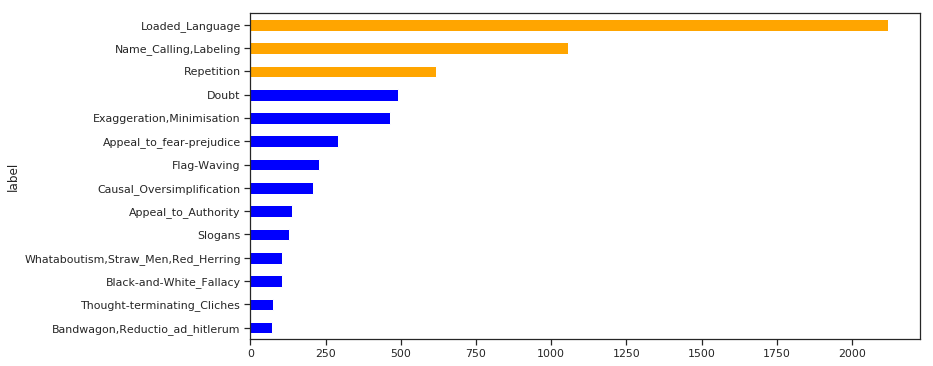

In [37]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange", "orange", "orange"]
df_stat["count"].sort_values().plot.barh(color=color_list)

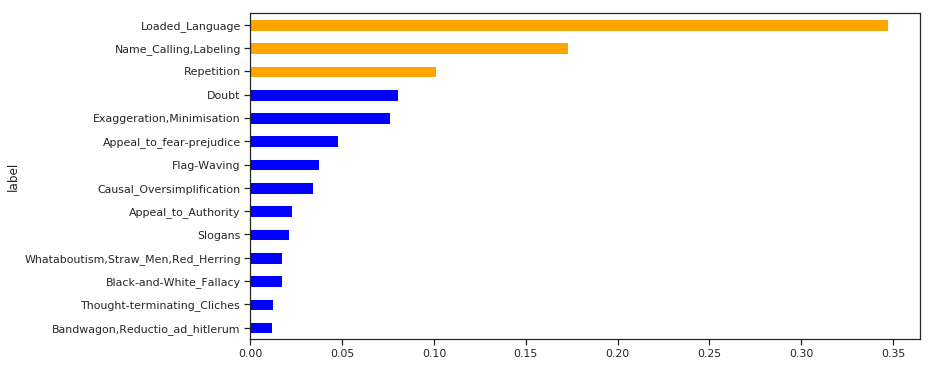

In [38]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange", "orange", "orange"]
df_stat["count_normalized"].sort_values().plot.barh(color=color_list)

#### 5. Classes by the average span length

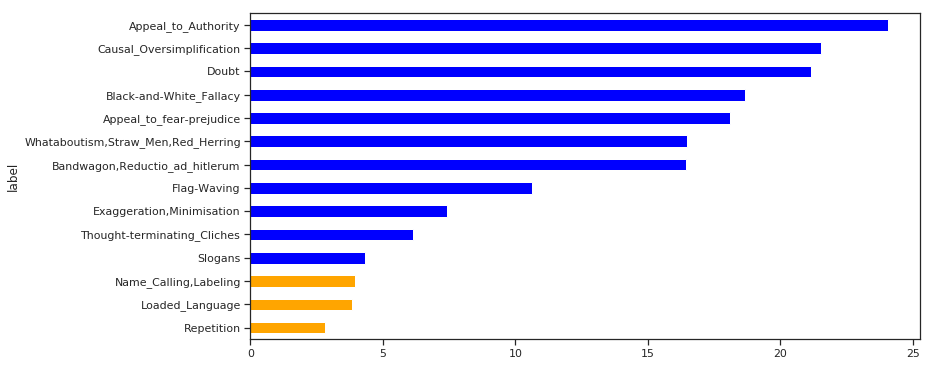

In [39]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["orange", "orange", "orange", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue"]
df.groupby("label").span_length.mean().sort_values().plot.barh(color=color_list)

An interesting observation is that three most popular classes usually have the shortest span length. While those classes represent ~60% of propaganda in the training set their average span length is a bit more than 3 words.

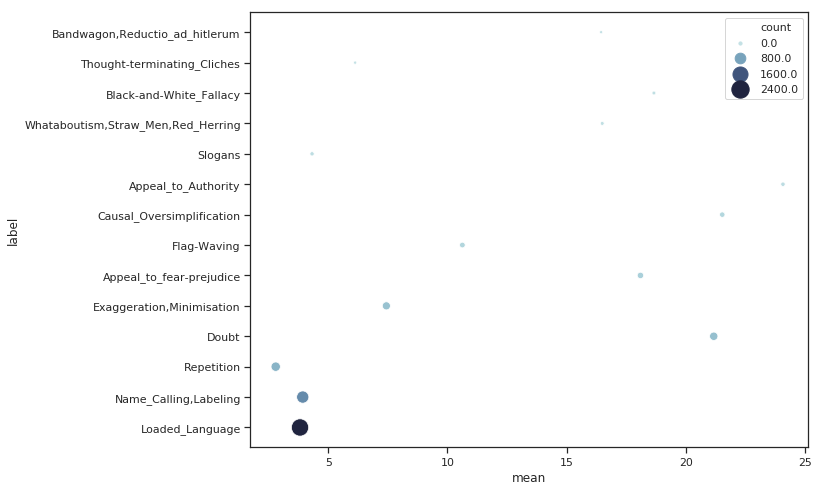

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
df_stat = df_stat.reset_index()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="mean", y="label",
                     hue="count", size="count",
                     palette=cmap, sizes=(10, 300),
                     data=df_stat)

In [41]:
df.groupby("label").get_group('Loaded_Language')["span"].get_values()

array(['the nation that gave the world the Magna Carta is dead"',
       'delighted" with the decision', 'a striking blow against freedom',
       ..., 'to vilify him', 'sham', 'social justice crybullying'],
      dtype=object)

In [42]:
df["document_id"].unique().size

356

In [43]:
df.shape

(6105, 6)

### Repetition analysis of train data

In [44]:
repetition_instances = df[df["label"] == "Repetition"]

In [46]:
repetition_instances.head()

,document_id,label,idx_from,idx_to,span,span_length
3,111111111,Repetition,1069,1091,"a very, very different",4
94,111111131,Repetition,4030,4038,historic,1
98,111111131,Repetition,4339,4352,very talented,2
99,111111131,Repetition,4531,4546,brutal dictator,2
105,111111131,Repetition,5281,5289,historic,1


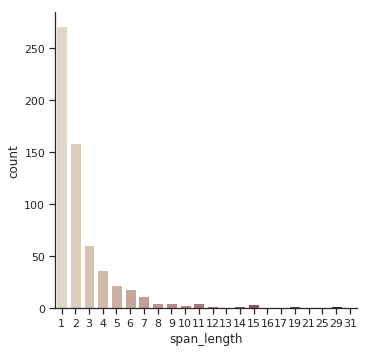

In [79]:
sns.catplot(x="span_length", kind="count", palette="ch:.25", data=repetition_instances)

If we group all instances of length >= 10.

In [77]:
reps_lengs = [length if length < 10 else 10 for length in repetition_instances["span_length"]]

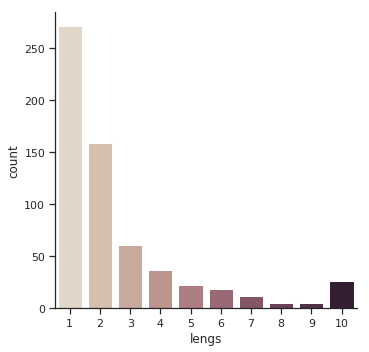

In [78]:
sns.catplot(x="lengs", kind="count", palette="ch:.25", data=pd.DataFrame(data=reps_lengs, columns=["lengs"]))

Counting the number of short spans (less than 4 tokens) for the "Repetition" class.

In [92]:
short_reps = repetition_instances[repetition_instances["span_length"] <= 3]

In [93]:
text_short_reps = short_reps["span"].tolist()

In [94]:
len(text_short_reps)

491